In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from scipy import optimize
from scipy import stats
from scipy import special

from iminuit import Minuit, cost


# uniform

In [2]:
def uniform(xe, s):
    return n * s * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, s=0) # initial paramters for fit
    m.limits["s"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m
                     

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 120.3 (chi2/ndof = 6.3)    │              Nfcn = 43               │
│ EDM = 3.7e-05 (Goal: 0.0002)     │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

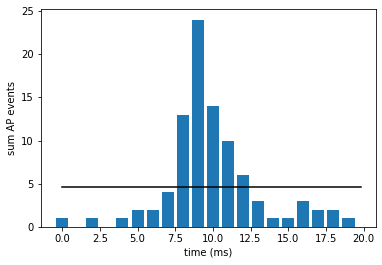

In [3]:
data = np.array([1,0,1,0,1,2,2,4,13,24,14,10,6,3,1,1,3,2,2,1])
sumw = np.sum(data)
n = np.sum(data)
xe = np.arange(0,data.shape[0]+1,1)
bins = np.arange(0,data.shape[0])
interp = np.arange(0,data.shape[0],.1)

#data
c = cost.ExtendedBinnedNLL(data, xe, uniform)
m = fit(c)
print(m)

#graph the data
plt.bar(bins, data)
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')

plt.plot(interp[:-1], np.diff(uniform(interp, *m.values))*interp.shape[0]/len(data), label="fit", color='k')
plt.show()


## Gaussian distribution

In [4]:
def gaussianUniform(xe, z, mu, sigma):
    return (1-z) * n * stats.norm.cdf(xe, mu, sigma) + z * n * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, z=0, mu=1, sigma=0.1) # initial paramters for fit
    m.limits["z", "mu", "sigma"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m 

(20,)
(21,)
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.82 (chi2/ndof = 0.7)    │              Nfcn = 277              │
│ EDM = 3.37e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬───

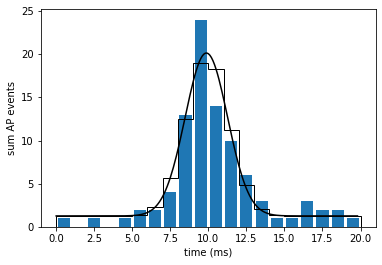

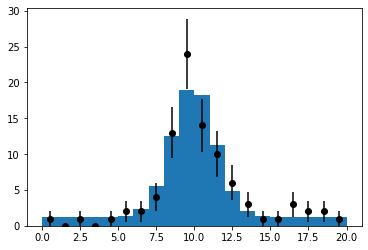

In [5]:
w = np.array([1,0,1,0,1,2,2,4,13,24,14,10,6,3,1,1,3,2,2,1])
sumw = np.sum(w)
n = np.sum(w)
xe = np.arange(0,w.shape[0]+1,1)
print(w.shape)
print(xe.shape)



interp = np.arange(0,w.shape[0],.1)

#data

c = cost.ExtendedBinnedNLL(w, xe, gaussianUniform)
m = fit(c)
print(m)

#graph the data
plt.bar(xe[:-1]+0.5, w)
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')

plt.stairs(np.diff(gaussianUniform(xe, *m.values)), xe, label="fit", color='k') #histogram fit

plt.plot(interp[:-1], np.diff(gaussianUniform(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit

plt.show()
m.visualize()
# plt.plot(interp[:-1], np.diff(integral(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit



## von Mises 

In [6]:
def vonMises(xe, kappa, loc, scale):
    return n * stats.vonmises.cdf(xe, kappa, loc, scale)

def fit(c):
    m = Minuit(c, kappa=1, loc=0.5, scale=0.1) # initial paramters for fit
    m.limits['kappa', 'scale'] = (0, 10)
    m.limits['loc'] = (-np.pi, np.pi) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.86 (chi2/ndof = 0.9)    │              Nfcn = 130              │
│ EDM = 2.41e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

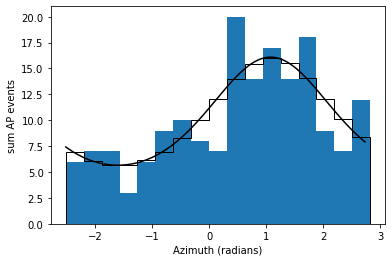

In [7]:
w = np.array([ 6.,  7.,  7.,  3.,  6.,  9., 10.,  8.,  7., 20., 14., 17., 14., 18.,  9.,  7., 12.])
# azim = np.array([-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144])
azim = np.arange(-144-9, 144+10, 18)
xe = azim * (np.pi/180)
interp = np.arange(xe[0],xe[-1],.05)

#data
n = np.sum(w)
c = cost.ExtendedBinnedNLL(w, xe, vonMises)
m = fit(c)
print(m)

#print the fit parameters


#graph the data
binwidth = 18*np.pi/180
plt.bar(xe[:-1]+binwidth, w, width=binwidth)
plt.xlabel('Azimuth (radians)')
plt.ylabel('sum AP events')

plt.stairs(np.diff(vonMises(xe, *m.values)), xe+binwidth/2, label="fit", color='k') #histogram fit
plt.plot(interp[:-1]+binwidth/2, np.diff(vonMises(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit

plt.show()


## Kent distribution

In [8]:
def sphericalUnit(theta, phi):
    # this function gives a unit vectors of spherical coordinates.
    # the notation is based on Arfken
    # theta is polar angle
    # phi is azimuthal angle.

    st = np.sin(theta);
    ct = np.cos(theta);
    sp = np.sin(phi);
    cp = np.cos(phi);

    unitvecs = np.array([[st * cp,  ct * cp, -sp],
                [st * sp,  ct * sp,  cp],
                [ct,      -st,      0]])
    
    return unitvecs

def sph2cart(theta, phi):
    # this returns cartesian coord based on the spherical coordinates.
    # this assumes a unit circle
    return [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]

def rodrot(targetvector, rotationaxis, angle):
    # this function does rotation of a vector in 3d space accordingly to
    # Rodrigues rotation formula.
    r1 = targetvector*np.cos(angle)
    r2 = np.cross(rotationaxis, targetvector) * np.sin(angle)
    r3 = rotationaxis * (np.transpose(rotationaxis) * targetvector) * (1 - np.cos(angle))
     
    return np.squeeze(r1 + r2 + r3)

def kent(xe, height, beta, kappa, gamma1, gamma2, gamma3):
    xyz = xe.T
    
    kent_dist = height * np.exp(-kappa) * np.exp(kappa * np.dot(xyz, gamma1) + 
            beta * kappa * (np.dot(xyz, gamma2)**2 - np.dot(xyz, gamma3)**2)) 
    
    return np.squeeze(kent_dist)

def kentdist(xe, kappa, beta, theta, phi, alpha, height):
    
    units = sphericalUnit(theta, phi)
    gamma1 = units[:, 0]

    gamma2 = rodrot(units[:, 1], units[:, 0], alpha)
    gamma3 = rodrot(units[:, 2], units[:, 0], alpha)
    
    return kent(xe, height, beta, kappa, gamma1, gamma2, gamma3)

def kentRandStartFit(c):
    kappa = np.random.uniform(low=0, high=100, size=1)
    beta = np.random.uniform(low=-0.5, high=0.5, size=1)
    theta = np.random.uniform(low=0, high=np.pi/2, size=1)
    phi =  np.random.uniform(low = -2 * np.pi, high = 2 * np.pi, size=1)
    alpha = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=1)
    height = np.random.uniform(low=0, high =100, size=1)
    
    m = Minuit(c, kappa=kappa, beta=beta, theta=theta, phi=phi, alpha=alpha, height=height) # initial paramters for fit
    m.limits['kappa'] = (0, 100)
    m.limits['beta'] = (-3, 3)
    m.limits['theta'] = (0, np.pi/2)
    m.limits['phi', 'alpha'] =  (-np.pi, np.pi)
    m.limits['height'] = (0,100)    
    m.migrad() #gradient descent
    assert m.valid
    
    return m




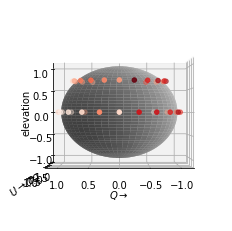

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 117 (chi2/ndof = 4.2)      │              Nfcn = 659              │
│ EDM = 1.66e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬────

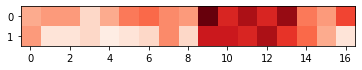

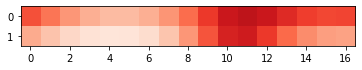

['LEAST_SQUARES', 'LIKELIHOOD', '__annotations__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_copy_state_if_needed', '_covariance', '_draw_profile', '_edm_goal', '_errors', '_fcn', '_fixed', '_fmin', '_fmin_does_not_exist_or_last_state_was_modified', '_free_parameters', '_init_state', '_last_state', '_limits', '_make_covariance', '_merrors', '_migrad_maxcall', '_mnprecision', '_normalize_bound', '_pos2var', '_precision', '_repr_html_', '_repr_pretty_', '_strategy', '_tolerance', '_values', '_var2pos', '_visualize', 'accurate', 'contour', 'covariance', 'draw_contour', 'draw_mncontour', 'draw_mnmatrix', 'draw_mnprofile', 'draw_profile', 'errordef', 'errors', 'fcn', 'fixed', 'fmin', 'fval', 'grad', 'hesse

In [10]:
w = np.array([[ 7.,  2.,  2.,  3.,  1.,  2.,  3.,  8.,  3., 15., 15., 14., 17., 13., 10.,  6.,  2.],
              [ 6.,  7.,  7.,  3.,  6.,  9., 10.,  8.,  7., 20., 14., 17., 14., 18.,  9.,  7., 12.]])

azim = -1*np.array([-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144])
elev = 90-np.array([0,40])
azim = azim*np.pi/180
elev = elev*np.pi/180

def grid3d(gridsize = 200):

    u = np.linspace(0, 2 * np.pi, gridsize)
    v = np.linspace(0, np.pi, gridsize)

    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
#     keys = list()
#     points = list()
#     for i in range(gridsize):
#         for j in range(gridsize):
#             points.append([x[i, j], y[i, j], z[i, j]])
#             keys.append((i, j))
#     points = np.array(points)

#     value_for_color = np.ones(gridsize)
#     colors = np.empty((gridsize, gridsize), dtype=tuple)
#     for i, j in keys:
#         colors[i, j] = (1.0, 1.0, 1.0, 1.0)
        
    return x, y, z#, points, colors

def azimElevCoord(azim, elev, data):
    corz = np.cos(elev)
    xs = np.zeros([elev.shape[0]*azim.shape[0],4])
    n=0
    
    for k in np.arange(corz.shape[0]):
        corx = np.sin(elev[k])*np.sin(azim)
        cory = np.sin(elev[k])*np.cos(azim)
        for i in np.arange(corx.shape[0]):
            xs[n,0] = corx[i]
            xs[n,1] = cory[i]
            xs[n,2] = corz[k]
            xs[n,3] = data[k,i]
            n+=1
    return xs


x, y, z = grid3d(gridsize = 200)

xs = azimElevCoord(azim, elev, w)

f = plt.figure()

ax = f.add_subplot(111, projection='3d')
xx, yy, zz, colors = list(zip(*xs))  # plot only a portion of these values
ax.scatter(1.05 * np.array(xx), 1.05 *
           np.array(yy), 1.05 * np.array(zz), c=colors, cmap='Reds', vmin=0, vmax=20)
ax.plot_surface(x, y, z, rstride=4, cstride=4,
                color='lightgray',
#             facecolors=colors, 
            linewidth=0)
ax.set_xlabel(r"$Q\rightarrow$")
ax.set_ylabel(r"$U\rightarrow$")
ax.set_zlabel('elevation')
ax.view_init(0,90)
plt.show()

interp = np.arange(azim[0],azim[-1],.1)

y = xs[:,3]

c = cost.LeastSquares(xs[:,:3].T, y, yerror=1, model=kentdist, loss = 'soft_l1')
c._ndim = 3

m = kentRandStartFit(c)
print(m)
# #graph the data
fitdist = kentdist(xs[:,:3].T, *m.values).reshape(w.shape)

maxval = np.max(w)
minval = 0
plt.imshow(w[::-1], vmin=minval, vmax=maxval, cmap='Reds')
plt.show()
plt.imshow(fitdist[::-1], vmin=minval, vmax=maxval, cmap='Reds')
plt.show()

print(dir(m))

-179.99999999687677 1.1402161551552759
<bound method Minuit.hesse of <FMin algorithm='Migrad' edm=1.657164866579425e-05 edm_goal=0.0002 errordef=1.0 fval=117.02867118116757 has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=True has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=True hesse_failed=False is_above_max_edm=False is_valid=True nfcn=659 ngrad=0 reduced_chi2=4.179595399327413 time=0.09079669299535453>
(Param(number=0, name='kappa', value=1.2635286759167657, error=0.12851605888288498, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=100.0), Param(number=1, name='beta', value=-0.7658848776573633, error=0.11564529101088378, merror=None, is_const=False, is_fixed=False, lower_limit=-3.0, upper_limit=3.0), Param(number=2, name='theta', value=0.6309770299389716, error=0.04146340730649917, merror=None, is_const=False, is_fixed=False, lower_limit=0.0, upper_limit=1.5707963267948966), Param(numbe

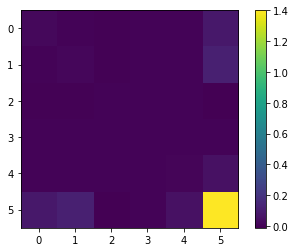

In [11]:
print(m.values['phi']*180/np.pi, m.errors['phi']*180/np.pi)
print(m.hesse)
print(m.init_params)
print(m.params)
# print(m.errors)
# print(m.parameters)

plt.imshow(m.covariance)
plt.colorbar()
plt.show()

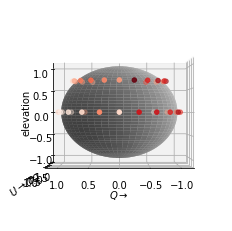

(34,) (34, 3)
1 2


ValueError: n must either have same dimension as xe or one extra

In [12]:
w = np.array([[ 7.,  2.,  2.,  3.,  1.,  2.,  3.,  8.,  3., 15., 15., 14., 17., 13., 10.,  6.,  2.],
              [ 6.,  7.,  7.,  3.,  6.,  9., 10.,  8.,  7., 20., 14., 17., 14., 18.,  9.,  7., 12.]])

azim = -1*np.array([-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144])
elev = 90-np.array([0,40])
azim = azim*np.pi/180
elev = elev*np.pi/180

def grid3d(gridsize = 200):

    u = np.linspace(0, 2 * np.pi, gridsize)
    v = np.linspace(0, np.pi, gridsize)

    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
#     keys = list()
#     points = list()
#     for i in range(gridsize):
#         for j in range(gridsize):
#             points.append([x[i, j], y[i, j], z[i, j]])
#             keys.append((i, j))
#     points = np.array(points)

#     value_for_color = np.ones(gridsize)
#     colors = np.empty((gridsize, gridsize), dtype=tuple)
#     for i, j in keys:
#         colors[i, j] = (1.0, 1.0, 1.0, 1.0)
        
    return x, y, z#, points, colors

def azimElevCoord(azim, elev, data):
    corz = np.cos(elev)
    xs = np.zeros([elev.shape[0]*azim.shape[0],4])
    n=0
    
    for k in np.arange(corz.shape[0]):
        corx = np.sin(elev[k])*np.sin(azim)
        cory = np.sin(elev[k])*np.cos(azim)
        for i in np.arange(corx.shape[0]):
            xs[n,0] = corx[i]
            xs[n,1] = cory[i]
            xs[n,2] = corz[k]
            xs[n,3] = data[k,i]
            n+=1
    return xs


x, y, z = grid3d(gridsize = 200)

xs = azimElevCoord(azim, elev, w)

f = plt.figure()

ax = f.add_subplot(111, projection='3d')
xx, yy, zz, colors = list(zip(*xs))  # plot only a portion of these values
ax.scatter(1.05 * np.array(xx), 1.05 *
           np.array(yy), 1.05 * np.array(zz), c=colors, cmap='Reds', vmin=0, vmax=20)
ax.plot_surface(x, y, z, rstride=4, cstride=4,
                color='lightgray',
#             facecolors=colors, 
            linewidth=0)
ax.set_xlabel(r"$Q\rightarrow$")
ax.set_ylabel(r"$U\rightarrow$")
ax.set_zlabel('elevation')
ax.view_init(0,90)
plt.show()

interp = np.arange(azim[0],azim[-1],.1)

y = xs[:,3]
y_extra = np.concatenate(([0], y))


print(y.shape, xs[:,:3].shape)
print(y.ndim, xs[:,:3].ndim)

c = cost.ExtendedBinnedNLL(y, xs[:,:3].T, kentdist)
c._ndim = 3

m = kentRandStartFit(c)
print(m)
# #graph the data
fitdist = kentdist(xs[:,:3].T, *m.values).reshape(w.shape)

maxval = np.max(w)
minval = 0
plt.imshow(w[::-1], vmin=minval, vmax=maxval, cmap='Reds')
plt.show()
plt.imshow(fitdist[::-1], vmin=minval, vmax=maxval, cmap='Reds')
plt.show()

print(dir(m))

In [ ]:
xr = (0, 2)  # xrange

rng = np.random.default_rng(1)

xdata = rng.normal(1, 0.1, size=1000)
ydata = rng.exponential(size=len(xdata))
xmix = np.append(xdata, ydata)
xmix = xmix[(xr[0] < xmix) & (xmix < xr[1])]

n, xe = np.histogram(xmix, bins=20, range=xr)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xmix, np.zeros_like(xmix), "|", alpha=0.1)

plt.show()

n2, _, ye = np.histogram2d(xdata, ydata, bins=(20, 5), range=(xr, (0, np.max(ydata))))

plt.pcolormesh(xe, ye, n2.T)
plt.scatter(xdata, ydata, marker=".", color="w", s=1)

In [ ]:
from numba_stats import truncnorm, truncexpon, norm, expon

def integral(xe, s, b, mu, sigma, tau):
    return (s * truncnorm.cdf(xe, *xr, mu, sigma) +
            b * truncexpon.cdf(xe, *xr, 0, tau))

c = cost.ExtendedBinnedNLL(n, xe, integral)
m = Minuit(c, s=300, b=1500, mu=0, sigma=0.2, tau=2)
m.limits["s", "b", "sigma", "tau"] = (0, None)
m.migrad()



In [ ]:
def integral(xe_ye, n, mu, sigma, tau):
    xe, ye = xe_ye
    return n * norm.cdf(xe, mu, sigma) * expon.cdf(ye, 0, tau)

c = cost.ExtendedBinnedNLL(n2, (xe, ye), integral)
m = Minuit(c, n=1500, mu=0.1, sigma=0.2, tau=2)
m.limits["n", "sigma", "tau"] = (0, None)
m.migrad()

In [ ]:
print(xe.shape)
print(ye.shape)

## Multidimensional gaussian


In [31]:
def mvGaussianUniform(xe, z, mu, sigma):
    return (1-z) * n * stats.multivariate_normal.cdf(xe, mu, sigma) + z * n * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, z=0, mu=[1,1], sigma=[0.1,1]) # initial paramters for fit
    m.limits["z", "mu", "sigma"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m 


In [32]:
print(xall.shape)


d= stats.multivariate_normal.pdf(xall.T, mean=[5,3], cov=[[1,0],[0,0.9]])
plt.imshow(d.reshape((19,6)).T, vmin=0)
plt.colorbar()
plt.show()

NameError: name 'xall' is not defined

In [ ]:
w = stats.multivariate_normal.rvs(mean=[5,1],cov=[[0.025,1],[1, 0.0025]], size=200).T + np.random.random(200)*0.2

plt.scatter(w[0], w[1])
plt.show()

n, xe, ye = np.histogram2d(w[0], w[1],bins=[5,18])

plt.imshow(n, vmin=0)
plt.colorbar()
plt.show()

print(xe.shape, ye.shape)

xs, ys = np.meshgrid(xe[:-1], ye[:-1])


print(xs.shape, ys.shape)


xall = np.concatenate((xs.reshape(xs.size)[None,:], ys.reshape(ys.size)[None,:]))
print(xall.shape)
# print(xall.T)
data = n.reshape(n.size)
# print(N.shape)
print(n.shape)
print(len(n))
# plt.scatter(xall[0], xall[1], c=data)
# plt.colorbar()
# plt.show()
# print(n.size)
print(data.shape)
# print(w)

sumw = np.sum(data)
n = np.sum(data)
xe = np.arange(0,data.shape[0]+1,1)

interp = np.arange(0,data.shape[0],.1)

#data

# c = cost.ExtendedBinnedNLL(w, xall.T, mvGaussianUniform)
c = cost.ExtendedBinnedNLL(n, xall.T, mvGaussianUniform)
m = fit(c)
print(m)

#graph the data
plt.bar(xe[:-1]+0.5, w)
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')

plt.stairs(np.diff(gaussianUniform(xe, *m.values)), xe, label="fit", color='k') #histogram fit

plt.plot(interp[:-1], np.diff(gaussianUniform(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit

plt.show()
m.visualize()
plt.plot(interp[:-1], np.diff(integral(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit



In [ ]:
def mvGaussianUniform(xe_ye, z, mu, sigma):
    
    xe, ye = xe_ye
    
    return (1-z) * n * stats.norm.cdf(xe, mu1, sigma1) * \
           (1-z) * n * stats.norm.cdf(ye, mu2, sigma2) +\
            z * n * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, z=0, mu1=1, mu2=0, sigma1=0.1, sigma2=1) # initial paramters for fit
    m.limits["z", "mu1", "sigma1", "mu2", "sigma2"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m 


In [ ]:
w = stats.multivariate_normal.rvs(mean=[5,1],cov=[[0.025,1],[1, 0.0025]], size=200).T + np.random.random(200)*0.2

plt.scatter(w[0], w[1])
plt.show()

n, xe, ye = np.histogram2d(w[0], w[1],bins=[5,18])

xs, ys = np.meshgrid(xe[:-1], ye[:-1])

plt.imshow(n[::-1], vmin=0)
plt.colorbar()
plt.show()
plt.imshow(xs.T)
plt.colorbar()
plt.show()
plt.imshow(ys.T)
plt.colorbar()
plt.show()

xs, ys = np.meshgrid(xe[:-1], ye[:-1])
xall = np.concatenate((xs.T.reshape(xs.size)[None,:], ys.T.reshape(ys.size)[None,:]))
data = n.reshape(n.size)


sumw = np.sum(data)
# n = np.sum(data)

interp = np.arange(0,data.shape[0],.1)

#data
print(xs.shape, ys.shape)
print(xall.shape)
print(n.T.shape)
print(len(n))
print(data.shape)

plt.scatter(xall[1], xall[0], c=data)
plt.colorbar()
plt.show()

# c = cost.ExtendedBinnedNLL(w, xall.T, mvGaussianUniform)
c = cost.ExtendedBinnedNLL(data, (xe[:-1], ye[:-1]), mvGaussianUniform)
m = fit(c)
print(m)

#graph the data
plt.bar(xe[:-1]+0.5, w)
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')

plt.stairs(np.diff(gaussianUniform(xe, *m.values)), xe, label="fit", color='k') #histogram fit

plt.plot(interp[:-1], np.diff(gaussianUniform(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit

plt.show()
m.visualize()
plt.plot(interp[:-1], np.diff(integral(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit



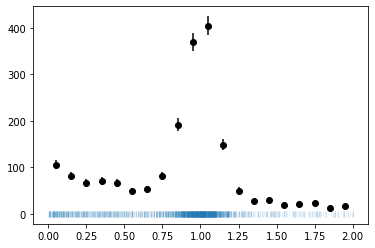

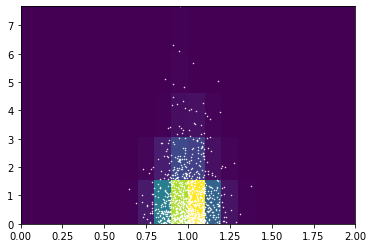

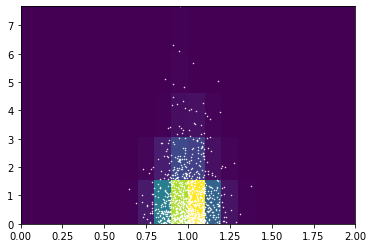

In [41]:
from iminuit import cost, Minuit
# faster than scipy.stats functions
from numba_stats import truncnorm, truncexpon, norm, expon
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as mvnorm

xr = (0, 2)  # xrange

rng = np.random.default_rng(1)

xdata = rng.normal(1, 0.1, size=1000)
ydata = rng.exponential(size=len(xdata))
xmix = np.append(xdata, ydata)
xmix = xmix[(xr[0] < xmix) & (xmix < xr[1])]

n, xe = np.histogram(xmix, bins=20, range=xr)
cx = 0.5 * (xe[1:] + xe[:-1])
dx = np.diff(xe)

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xmix, np.zeros_like(xmix), "|", alpha=0.1);
plt.show()

n2, xe2, ye = np.histogram2d(xdata, ydata, bins=(20, 5), range=(xr, (0, np.max(ydata))))

plt.pcolormesh(xe, ye, n2.T)
plt.scatter(xdata, ydata, marker=".", color="w", s=1);
plt.show()
plt.pcolormesh(xe2, ye, n2.T)
plt.scatter(xdata, ydata, marker=".", color="w", s=1);
plt.show()


8.245661647974664


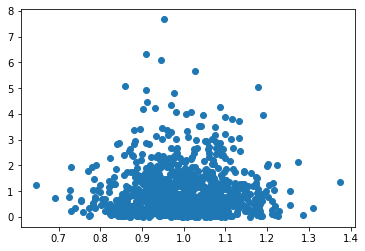

[ 8.24566165  7.32344703  7.07835023  7.18872107  5.28026082  7.55497212
  7.01309074  7.77153612  6.76955213  8.04280452  6.37069717  8.04298513
  7.55049546  5.57499781  6.01094318  5.54859033  6.47523554  7.68604022
  7.08556423  6.65678904  7.75420572  7.1076116   6.6133932   6.50236804
  4.4749429   5.88709933  6.48956756  7.32842921  6.5711158   6.70097846
  5.28093974  5.81971115  6.74998511  4.78465724  8.04124148  8.03586292
  6.76112606  6.69906729  7.92504141  5.11459105  6.66354464  3.7749863
  7.07781779  7.81034817  8.27154516  8.27050009  8.30479764  7.70213516
  6.61110042  7.57153851  7.74908028  5.9764018   5.90776124  8.16036283
  7.43660813  7.0408777   6.30362685  7.19371919  7.45564699  7.69371667
  7.4897306   2.44420966  7.09431672  7.03079105  6.79267942  5.92407521
  7.48937684  7.88879809  5.69817362  8.1634416   6.59751952  7.56251635
  7.03471931  4.72883315  5.55288219  7.27992818  8.20188437  6.64654395
  6.53708991  7.09682398  6.90358384  6.30226031  6.

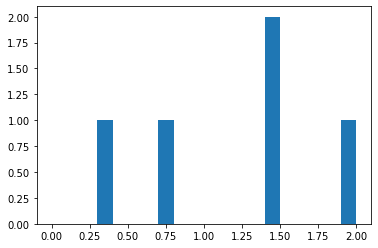

In [40]:
def logdensity(xy, n, mu, sigma, tau):
    x, y = xy
    return n, np.log(n) + norm.logpdf(x, mu, sigma) + expon.logpdf(y, 0, tau)


c = cost.ExtendedUnbinnedNLL((xdata, ydata), logdensity, log=True)
m = Minuit(c, n=1, mu=1, sigma=2, tau=2)
m.limits["n", "sigma", "tau"] = (0, None)
m.migrad()
      
fitdist = logdensity((xdata, ydata), *m.values)[1]

print(fitdist[0])


plt.scatter(xdata, ydata)
plt.show()
print(fitdist)
plt.hist(fitdist, bins=xe)
plt.show()

In [35]:
m.visualize()

ValueError: visualize is not implemented for multi-dimensional data